## 1. Quá trình ARIMA


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

In [42]:
df = pd.read_csv('BTC_CSV5.csv')
df.pop('Currency')
df.pop('24h Open (USD)')
df.pop('24h High (USD)')
df.pop('24h Low (USD)')
df.pop('Closing Price (USD)')
df

,Date,Closing_Price
0,2020-05-21,0.954089
1,2020-05-22,0.914115
2,2020-05-23,0.919285
3,2020-05-24,0.922008
4,2020-05-25,0.904872
...,...,...
362,2021-05-18,4.314447
363,2021-05-19,4.319605
364,2021-05-20,3.943924
365,2021-05-21,3.975609


In [43]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index("Date",inplace=True)

In [44]:
df

,Closing_Price
Date,
2020-05-21,0.954089
2020-05-22,0.914115
2020-05-23,0.919285
2020-05-24,0.922008
2020-05-25,0.904872
...,...
2021-05-18,4.314447
2021-05-19,4.319605
2021-05-20,3.943924


In [45]:
train, test = df[df.index < '2021-01-01'], df[df.index >= '2021-01-01']
print('train shape: ', train.shape)
print('test shape: ', test.shape)

train shape:  (225, 1)
test shape:  (142, 1)


In [46]:
diff_1 = train.diff().dropna()
print("p-value:", adfuller(diff_1.dropna())[1])

p-value: 5.314274119928386e-24


In [47]:
import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
    return autoarima_model

In [48]:
arima_model = arimamodel(train)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-797.404, Time=2.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-793.785, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-794.158, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-793.914, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-786.071, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-791.051, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-794.529, Time=0.97 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-792.632, Time=0.49 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-792.788, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-793.197, Time=1.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-798.305, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-787.819, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-788.485, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-796.626, Time=0.55 sec
 ARIMA(1,1,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  225
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 402.152
Date:                Mon, 31 May 2021   AIC                           -798.305
Time:                        22:08:36   BIC                           -788.070
Sample:                             0   HQIC                          -794.174
                                - 225                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9949      0.022     45.694      0.000       0.952       1.038
ma.L1         -0.9473      0.047    -20.209      0.000      -1.039      -0.855
sigma2         0.0016   8.77e-05     18.318      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):               262.00
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               4.71   Skew:                             0.87
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
test['ARIMA'] = arima_model.predict(len(test))

test

<ipython-input-49-a1d8570d7eba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ARIMA'] = arima_model.predict(len(test))


,Closing_Price,ARIMA
Date,,
2021-01-01,2.911152,2.912109
2021-01-02,2.933361,2.947156
2021-01-03,3.215417,2.982025
2021-01-04,3.300254,3.016717
2021-01-05,3.143161,3.051233
...,...,...
2021-05-18,4.314447,6.378882
2021-05-19,4.319605,6.396343
2021-05-20,3.943924,6.413715


## 2. Quá trình tính phần lỗi

In [50]:
test['Error'] = test['Closing_Price'] -test['ARIMA']

test

<ipython-input-50-6d058dff0578>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Error'] = test['Closing_Price'] -test['ARIMA']


,Closing_Price,ARIMA,Error
Date,,,
2021-01-01,2.911152,2.912109,-0.000957
2021-01-02,2.933361,2.947156,-0.013795
2021-01-03,3.215417,2.982025,0.233392
2021-01-04,3.300254,3.016717,0.283536
2021-01-05,3.143161,3.051233,0.091928
...,...,...,...
2021-05-18,4.314447,6.378882,-2.064435
2021-05-19,4.319605,6.396343,-2.076738
2021-05-20,3.943924,6.413715,-2.469791


In [51]:
test['Date']=test.index
test

<ipython-input-51-944e01af4278>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Date']=test.index


,Closing_Price,ARIMA,Error,Date
Date,,,,
2021-01-01,2.911152,2.912109,-0.000957,2021-01-01
2021-01-02,2.933361,2.947156,-0.013795,2021-01-02
2021-01-03,3.215417,2.982025,0.233392,2021-01-03
2021-01-04,3.300254,3.016717,0.283536,2021-01-04
2021-01-05,3.143161,3.051233,0.091928,2021-01-05
...,...,...,...,...
2021-05-18,4.314447,6.378882,-2.064435,2021-05-18
2021-05-19,4.319605,6.396343,-2.076738,2021-05-19
2021-05-20,3.943924,6.413715,-2.469791,2021-05-20


In [52]:
test["timestamp"] = pd.to_datetime(test.Date).astype(np.int64)
test

<ipython-input-52-8a6519615d30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["timestamp"] = pd.to_datetime(test.Date).astype(np.int64)


,Closing_Price,ARIMA,Error,Date,timestamp
Date,,,,,
2021-01-01,2.911152,2.912109,-0.000957,2021-01-01,1609459200000000000
2021-01-02,2.933361,2.947156,-0.013795,2021-01-02,1609545600000000000
2021-01-03,3.215417,2.982025,0.233392,2021-01-03,1609632000000000000
2021-01-04,3.300254,3.016717,0.283536,2021-01-04,1609718400000000000
2021-01-05,3.143161,3.051233,0.091928,2021-01-05,1609804800000000000
...,...,...,...,...,...
2021-05-18,4.314447,6.378882,-2.064435,2021-05-18,1621296000000000000
2021-05-19,4.319605,6.396343,-2.076738,2021-05-19,1621382400000000000
2021-05-20,3.943924,6.413715,-2.469791,2021-05-20,1621468800000000000


In [53]:
test.pop('Date')
test

,Closing_Price,ARIMA,Error,timestamp
Date,,,,
2021-01-01,2.911152,2.912109,-0.000957,1609459200000000000
2021-01-02,2.933361,2.947156,-0.013795,1609545600000000000
2021-01-03,3.215417,2.982025,0.233392,1609632000000000000
2021-01-04,3.300254,3.016717,0.283536,1609718400000000000
2021-01-05,3.143161,3.051233,0.091928,1609804800000000000
...,...,...,...,...
2021-05-18,4.314447,6.378882,-2.064435,1621296000000000000
2021-05-19,4.319605,6.396343,-2.076738,1621382400000000000
2021-05-20,3.943924,6.413715,-2.469791,1621468800000000000


In [54]:
svr_df = test.copy()
svr_df.pop('Closing_Price')
svr_df.pop('ARIMA')
svr_df

,Error,timestamp
Date,,
2021-01-01,-0.000957,1609459200000000000
2021-01-02,-0.013795,1609545600000000000
2021-01-03,0.233392,1609632000000000000
2021-01-04,0.283536,1609718400000000000
2021-01-05,0.091928,1609804800000000000
...,...,...
2021-05-18,-2.064435,1621296000000000000
2021-05-19,-2.076738,1621382400000000000
2021-05-20,-2.469791,1621468800000000000


In [55]:
svr_df.reset_index(drop=True, inplace=True)
svr_df

,Error,timestamp
0,-0.000957,1609459200000000000
1,-0.013795,1609545600000000000
2,0.233392,1609632000000000000
3,0.283536,1609718400000000000
4,0.091928,1609804800000000000
...,...,...
137,-2.064435,1621296000000000000
138,-2.076738,1621382400000000000
139,-2.469791,1621468800000000000
140,-2.455389,1621555200000000000


In [56]:
svr_df = svr_df.values
X = svr_df[:,1].reshape(-1,1)
Y = svr_df[:,0:1]

In [57]:
#RBF
from sklearn.svm import SVR
rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X,Y)

c:\users\minh nhut\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [58]:
predict = rbf_svr.predict(X)

In [59]:
predict

array([ 0.37207044,  0.35363391,  0.33369334,  0.31236798,  0.28978902,
        0.26609873,  0.24144951,  0.21600285,  0.18992812,  0.16340133,
        0.13660372,  0.10972035,  0.08293864,  0.05644675,  0.03043208,
        0.00507967, -0.0194294 , -0.04291955, -0.0652222 , -0.08617728,
       -0.10563459, -0.12345513, -0.1395123 , -0.15369299, -0.16589855,
       -0.17604563, -0.18406685, -0.18991135, -0.19354514, -0.19495132,
       -0.19413008, -0.19109863, -0.18589089, -0.17855699, -0.16916275,
       -0.15778884, -0.14452994, -0.12949373, -0.11279971, -0.094578  ,
       -0.07496802, -0.05411711, -0.03217905, -0.00931263,  0.01431991,
        0.03855432,  0.06322588,  0.08817084,  0.11322784,  0.13823925,
        0.16305246,  0.1875211 ,  0.21150606,  0.23487655,  0.25751092,
        0.27929741,  0.30013475,  0.31993266,  0.33861216,  0.35610577,
        0.37235761,  0.38732328,  0.40096971,  0.4132748 ,  0.42422703,
        0.43382487,  0.44207617,  0.44899743,  0.45461296,  0.45

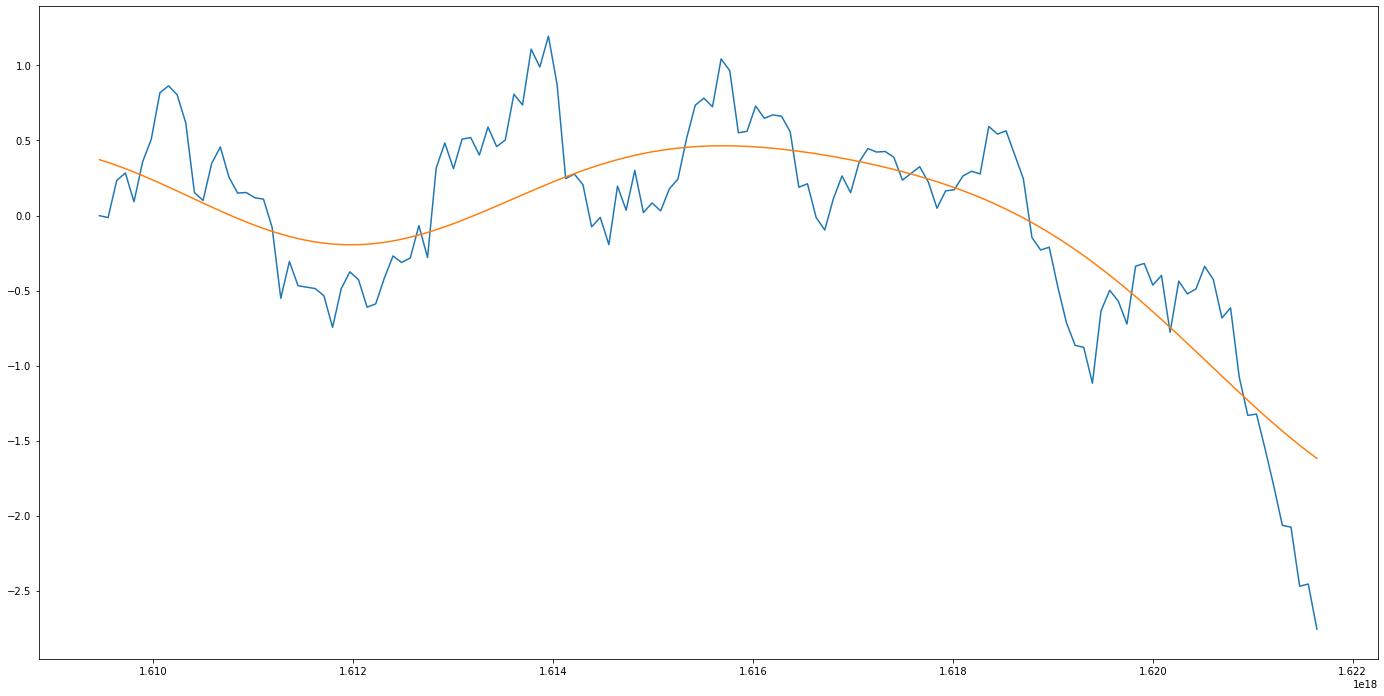

In [60]:
fig= plt.figure(figsize=(24,12))
plt.plot(X,Y)
plt.plot(X,predict)
plt.show()

In [61]:
test['Error_pred'] = predict
test

<ipython-input-61-779676f81ca4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Error_pred'] = predict


,Closing_Price,ARIMA,Error,timestamp,Error_pred
Date,,,,,
2021-01-01,2.911152,2.912109,-0.000957,1609459200000000000,0.372070
2021-01-02,2.933361,2.947156,-0.013795,1609545600000000000,0.353634
2021-01-03,3.215417,2.982025,0.233392,1609632000000000000,0.333693
2021-01-04,3.300254,3.016717,0.283536,1609718400000000000,0.312368
2021-01-05,3.143161,3.051233,0.091928,1609804800000000000,0.289789
...,...,...,...,...,...
2021-05-18,4.314447,6.378882,-2.064435,1621296000000000000,-1.436193
2021-05-19,4.319605,6.396343,-2.076738,1621382400000000000,-1.484203
2021-05-20,3.943924,6.413715,-2.469791,1621468800000000000,-1.530645


In [62]:
test['ARIMA_SVR']=test['ARIMA']+test['Error_pred']
test

<ipython-input-62-c83afedee362>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ARIMA_SVR']=test['ARIMA']+test['Error_pred']


,Closing_Price,ARIMA,Error,timestamp,Error_pred,ARIMA_SVR
Date,,,,,,
2021-01-01,2.911152,2.912109,-0.000957,1609459200000000000,0.372070,3.284180
2021-01-02,2.933361,2.947156,-0.013795,1609545600000000000,0.353634,3.300790
2021-01-03,3.215417,2.982025,0.233392,1609632000000000000,0.333693,3.315718
2021-01-04,3.300254,3.016717,0.283536,1609718400000000000,0.312368,3.329085
2021-01-05,3.143161,3.051233,0.091928,1609804800000000000,0.289789,3.341022
...,...,...,...,...,...,...
2021-05-18,4.314447,6.378882,-2.064435,1621296000000000000,-1.436193,4.942689
2021-05-19,4.319605,6.396343,-2.076738,1621382400000000000,-1.484203,4.912140
2021-05-20,3.943924,6.413715,-2.469791,1621468800000000000,-1.530645,4.883069


In [64]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [65]:
#MAPE
mean_absolute_percentage_error(test.Closing_Price, test.ARIMA_SVR)

6.827922291751238

In [66]:
#MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test.Closing_Price, test.ARIMA_SVR)

0.314579075925692

In [67]:
#MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(test.Closing_Price, test.ARIMA_SVR)

0.15174539275574966